
# Principal Component Analysis
# Analisis de Componentes Principales





PCA (Principal Component Analysis) es una técnica de análisis de datos que se utiliza para reducir la dimensionalidad de un conjunto de datos. En otras palabras, PCA nos permite representar un conjunto de variables en un espacio de menor dimensión, manteniendo la mayor cantidad posible de información.

El objetivo principal de PCA es encontrar las direcciones principales o componentes principales en los datos que explican la mayor variabilidad. Estos componentes principales son combinaciones lineales de las variables originales y se ordenan en función de su importancia en la explicación de la variabilidad de los datos.

Al reducir la dimensionalidad de los datos, PCA puede ayudar a simplificar la interpretación y visualización de los datos, así como a mejorar el rendimiento de los algoritmos de aprendizaje automático al eliminar características redundantes o irrelevantes.

En resumen, PCA es una técnica poderosa para reducir la dimensionalidad de los datos y encontrar las características más importantes que explican la variabilidad en los datos.

In [1]:
# importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# cargar datos USArrests
data = pd.read_csv('USArrests.csv')


El conjunto de datos USArrest contiene información sobre los arrestos por delitos violentos en los Estados Unidos. Cada fila del conjunto de datos representa un estado y contiene cuatro variables:

1. `Murder`: la tasa de asesinatos por cada 100,000 habitantes en el estado.
2. `Assault`: la tasa de agresiones por cada 100,000 habitantes en el estado.
3. `UrbanPop`: el porcentaje de la población urbana en el estado.
4. `Rape`: la tasa de violaciones por cada 100,000 habitantes en el estado.

El objetivo de este conjunto de datos es analizar las relaciones entre estas variables y los arrestos por delitos violentos en los diferentes estados de Estados Unidos. Puede utilizar este conjunto de datos para realizar análisis exploratorios, visualizaciones y modelado estadístico.

Si tienes alguna pregunta específica sobre cómo trabajar con este conjunto de datos o necesitas ayuda con algún código relacionado, no dudes en preguntar. Estoy aquí para ayudarte.

In [2]:
data.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [3]:
data.shape


(50, 5)

In [5]:
# Preprocesamiento

# cambiar nombre de la primera columna a id
data = data.rename(columns = {'Unnamed: 0': 'id'})

# copiar la columna id

id = data['id'].astype(str) # convertir a string
id.head() # mostrar los primeros 5 elementos

0       Alabama
1        Alaska
2       Arizona
3      Arkansas
4    California
Name: id, dtype: object

In [6]:
# drop first column
data = data.drop('id', axis = 1) # eliminar la columna id
data.shape # mostrar dimensiones

(50, 4)

In [8]:
## summarize the data

data.describe() # resumen de los datos

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [10]:
# normalizar los datos

scaler = StandardScaler() # instanciar el objeto StandardScaler, por defecto con media 0 y desviación estándar 1
data_scaled = scaler.fit_transform(data) # normalizar los datos usando z-score

## show the first ten lines of the data scaled

data_scaled[0:10]

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293]])

El z-score, también conocido como puntuación estándar, es una medida estadística que indica cuántas desviaciones estándar un valor particular se encuentra por encima o por debajo de la media de un conjunto de datos. 

El cálculo del z-score se realiza restando la media del conjunto de datos al valor específico y dividiendo el resultado por la desviación estándar. La fórmula es la siguiente:

z = (x - μ) / σ

Donde:
- z es el z-score
- x es el valor específico
- μ es la media del conjunto de datos
- σ es la desviación estándar del conjunto de datos

El z-score es útil para estandarizar y comparar valores en diferentes distribuciones. Un z-score positivo indica que el valor está por encima de la media, mientras que un z-score negativo indica que está por debajo de la media. Un z-score de 0 significa que el valor es igual a la media.

El z-score se utiliza en diversos campos, como el análisis de datos, la estadística inferencial y el aprendizaje automático. Puede ayudar a identificar valores atípicos, evaluar la normalidad de una distribución y realizar pruebas de hipótesis.

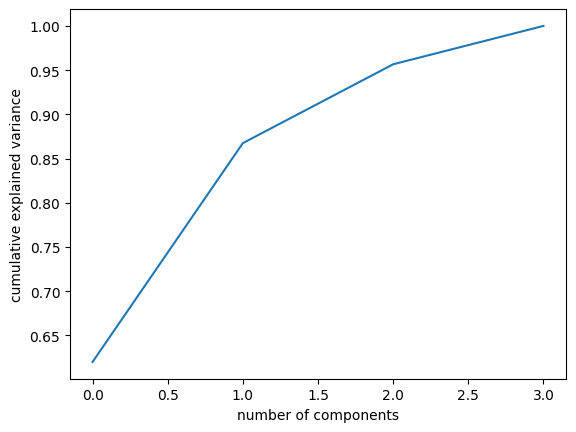

In [11]:
# PCA

pca = PCA(n_components = 4) # instanciar el objeto PCA con 4 componentes
pca.fit(data_scaled) # ajustar el modelo PCA a los datos normalizados

# variance explained by each component

pca.explained_variance_ratio_

# cumulative variance explained

np.cumsum(pca.explained_variance_ratio_)
# plot the cumulative variance explained

plt.plot(np.cumsum(pca.explained_variance_ratio_)) # plotear la varianza explicada acumulada
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()


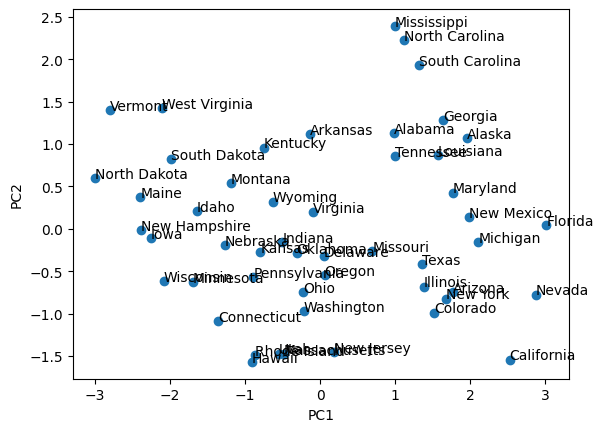

In [12]:
# plot the first two components

pca = PCA(n_components = 2) # instanciar el objeto PCA con 2 componentes
pca.fit(data_scaled) # ajustar el modelo PCA a los datos normalizados
data_reduced = pca.transform(data_scaled) # transformar los datos normalizados

plt.scatter(data_reduced[:, 0], data_reduced[:, 1]) # plotear los datos reducidos

for i in range(data_reduced.shape[0]): # añadir etiquetas a los puntos
    plt.text(data_reduced[i, 0], data_reduced[i, 1], id[i]) # añadir etiquetas

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [14]:
# reduce to 3 components

pca = PCA(n_components = 3) # instanciar el objeto PCA con 3 componentes
pca.fit(data_scaled) # ajustar el modelo PCA a los datos normalizados
data_reduced = pca.transform(data_scaled) # transformar los datos normalizados

data_reduced[0:10] # mostrar los primeros 10 elementos

array([[ 0.98556588,  1.13339238, -0.44426879],
       [ 1.95013775,  1.07321326,  2.04000333],
       [ 1.76316354, -0.74595678,  0.05478082],
       [-0.14142029,  1.11979678,  0.11457369],
       [ 2.52398013, -1.54293399,  0.5985568 ],
       [ 1.51456286, -0.98755509,  1.09500699],
       [-1.35864746, -1.08892789, -0.64325757],
       [ 0.04770931, -0.32535892, -0.71863294],
       [ 3.01304227,  0.03922851, -0.57682949],
       [ 1.63928304,  1.2789424 , -0.34246008]])

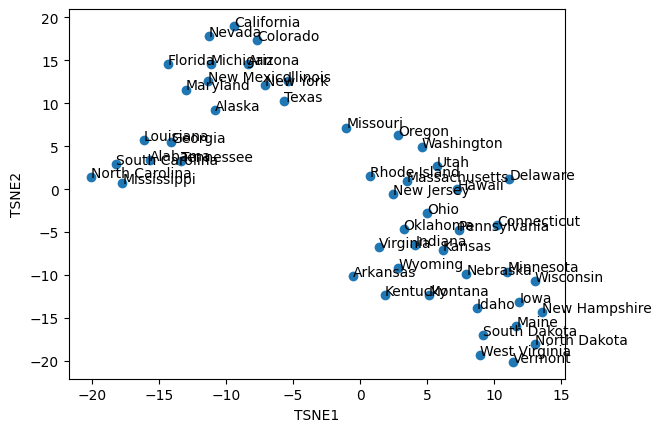

In [15]:
## build a TSNE plot

from sklearn.manifold import TSNE

tsne = TSNE(n_components = 2, perplexity = 10) # instanciar el objeto TSNE con 2 componentes y perplexity 10
data_tsne = tsne.fit_transform(data_scaled) # ajustar el modelo TSNE a los datos normalizados

plt.scatter(data_tsne[:, 0], data_tsne[:, 1]) # plotear los datos reducidos

for i in range(data_tsne.shape[0]): # añadir etiquetas a los puntos
    plt.text(data_tsne[i, 0], data_tsne[i, 1], id[i]) # añadir etiquetas

plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


## TSNE

t-SNE (t-Distributed Stochastic Neighbor Embedding) es una técnica de reducción de dimensionalidad no lineal que se utiliza para visualizar datos de alta dimensionalidad en un espacio de menor dimensión. A diferencia de otras técnicas de reducción de dimensionalidad, como PCA, t-SNE se centra en preservar las relaciones locales entre los puntos en lugar de la estructura global de los datos.

La idea principal detrás de t-SNE es mapear los puntos de datos de alta dimensionalidad a un espacio de menor dimensión de manera que los puntos similares en el espacio original estén cerca unos de otros en el espacio reducido. Esto se logra mediante la construcción de una distribución de probabilidad conjunta sobre los puntos en el espacio original y una distribución de probabilidad similar sobre los puntos en el espacio reducido. Luego, t-SNE minimiza la divergencia entre estas dos distribuciones utilizando métodos de optimización.

t-SNE es especialmente útil cuando se desea explorar y visualizar patrones y agrupaciones en datos complejos, como imágenes, texto o datos biológicos. Al reducir la dimensionalidad de los datos, t-SNE puede revelar estructuras y relaciones ocultas que no son fácilmente detectables en dimensiones más altas.

En resumen, t-SNE es una técnica poderosa para visualizar datos de alta dimensionalidad al preservar las relaciones locales entre los puntos. Puede ayudar a revelar patrones y agrupaciones en los datos, lo que facilita la interpretación y el análisis exploratorio.

Referencias utiles

https://distill.pub/2016/misread-tsne/

https://lvdmaaten.github.io/tsne/

https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding



## Conclusiones

En este Jupyter Notebook, hemos realizado un análisis de Componentes Principales (PCA) utilizando el conjunto de datos USArrests. A continuación, se presentan las conclusiones principales:

1. PCA es una técnica poderosa para reducir la dimensionalidad de los datos y encontrar las características más importantes que explican la variabilidad en los datos.

2. Al aplicar PCA al conjunto de datos USArrests, encontramos que los dos primeros componentes principales explican aproximadamente el 87% de la variabilidad en los datos.

3. Al visualizar los datos reducidos en un gráfico de dispersión, podemos observar patrones y agrupaciones en los datos. Esto puede ayudar a identificar relaciones y tendencias entre las variables.

4. También exploramos la técnica de t-SNE (t-Distributed Stochastic Neighbor Embedding) para visualizar los datos en un espacio de menor dimensión. Esta técnica puede ser útil cuando se desea preservar las relaciones locales entre los puntos.

En resumen, el análisis de Componentes Principales (PCA) y la técnica de t-SNE son herramientas útiles para explorar y visualizar conjuntos de datos de alta dimensionalidad. Estas técnicas pueden ayudar a identificar patrones, agrupaciones y relaciones entre las variables, lo que puede ser útil en el análisis exploratorio de datos y en la construcción de modelos predictivos.
